# **Sea ice edge and bird locations**

Plots the sea ice edge from UKESM and locations of tracked Arctic Terns

In [46]:
import pandas as pd
import xarray as xr
import numpy as np
import calendar
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')
import matplotlib

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 100

### **Read data**
**Read UKESM sea ice concentration data**

In [ ]:
data_directory_09 = '/gws/pw/j05/cop26_hackathons/bristol/project09/data/'

#!ls {data_directory_09}
regrid = xr.load_dataset(data_directory_09+'ETOPO_siconc_SImon_UKESM1-0-LL_historical_r1i1p1f2_185001-201412.nc')

x,y = np.meshgrid(regrid.ETOPO60X, regrid.ETOPO60Y)

**Read bird tracking data**

In [233]:
data_directory = '/home/users/train033/data/'
migration = pd.read_csv(data_directory+'Collated migration data.csv')
migration

,Study,Bird ID,Tag Type,Date,Time,Lat,Long,Height,Unnamed: 8,Unnamed: 9
0,Hawkes,16806,GPS,21/06/2018,11:00:22,64.016645,-22.774017,104.75,NaN,NaN
1,Hawkes,16806,GPS,22/06/2018,05:00:22,63.834938,-23.218450,87.50,NaN,NaN
2,Hawkes,16806,GPS,22/06/2018,23:00:21,64.043226,-22.787082,74.75,NaN,NaN
3,Hawkes,16806,GPS,23/06/2018,17:00:21,64.015814,-22.707573,76.50,NaN,NaN
4,Hawkes,16806,GPS,24/06/2018,11:00:19,63.708506,-23.260704,92.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6661,Alerstam,H (Y2),Geolocator,30/10/2015,11:01:29,-60.759818,100.677518,NaN,NaN,NaN
6662,Alerstam,H (Y2),Geolocator,31/10/2015,11:16:59,-60.235478,96.915129,NaN,NaN,NaN
6663,Alerstam,H (Y2),Geolocator,01/11/2015,11:53:30,-61.786717,87.655979,NaN,NaN,NaN
6664,Alerstam,H (Y2),Geolocator,02/11/2015,11:54:30,-59.831660,87.400420,NaN,NaN,NaN


In [21]:
np.unique(migration['Bird ID'])

array(['16806', '21829', 'A (Y1)', 'A (Y2)', 'ARTE_370', 'ARTE_371',
       'ARTE_373', 'ARTE_376', 'ARTE_390', 'ARTE_395', 'ARTE_406',
       'ARTE_408', 'ARTE_410', 'B', 'C', 'D', 'E (Y1)', 'E (Y2)', 'F',
       'G (Y1)', 'G (Y2)', 'H (Y1)', 'H (Y2)'], dtype=object)

### **Plot Arctic tern locations**

Text(0.5, 1.0, 'ARTE_376')

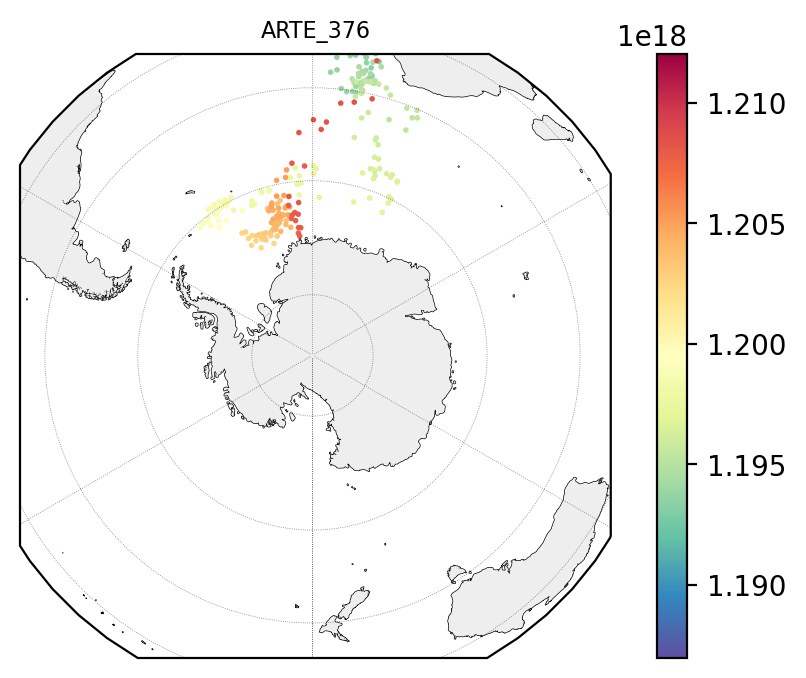

In [222]:
migration_1 = migration[migration['Bird ID']=='ARTE_376']

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-30,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')
im = plt.scatter(migration_1['Long'], migration_1['Lat'], c=pd.to_datetime(migration_1['Date'],dayfirst=True), cmap='Spectral_r', s=1,transform=ccrs.PlateCarree())
plt.colorbar()
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('ARTE_376',fontsize=8)

### **Plot sea ice edge and bird locations**

Text(0.5, 1.0, '2007-2008: Bird ARTE_390')

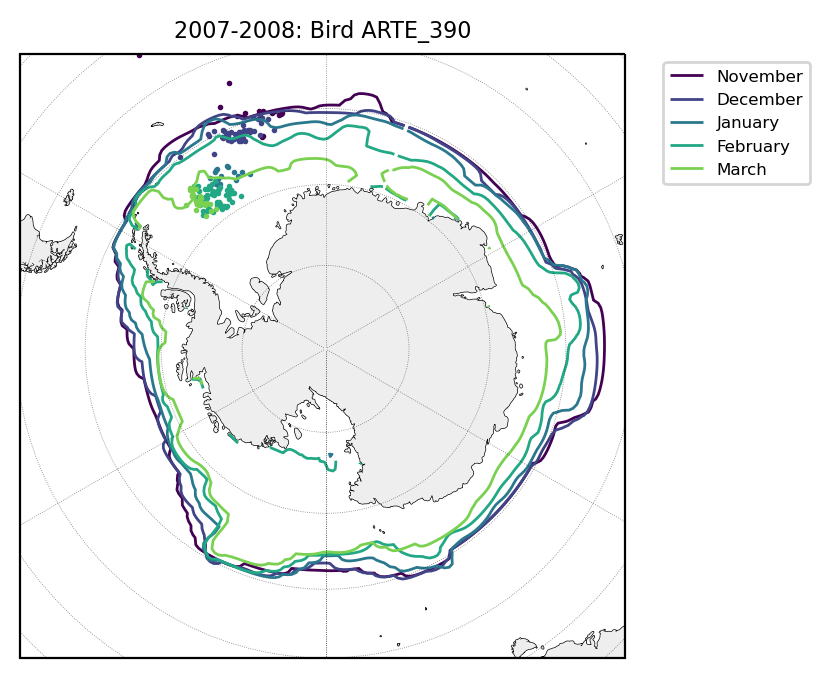

In [270]:
# Bird IDs with data all boreal summer
# 'A (Y1)', 'A (Y2)', 'ARTE_370', 'ARTE_371'
# 'ARTE_373', 'ARTE_376', 'ARTE_390', 'ARTE_395', 'ARTE_406'
# 'ARTE_408', 'ARTE_410', 'B', 'C', 'D', 'E (Y1)', 'E (Y2)', 'F'
# 'G (Y1)'

bird = 'ARTE_390'

migration_1 = migration[migration['Bird ID']==bird]
year = pd.to_datetime(migration_1['Date']).dt.year.iloc[0]
cmap = matplotlib.cm.get_cmap('viridis')

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

months = [11,12,1,2,3]
years = [year,year,year+1,year+1,year+1]
lines = []
labels = []
j=0
for i in range(5):
    migr_temp = migration_1[pd.to_datetime(migration_1['Date'], dayfirst=True).dt.month==months[i]]
    plt.scatter(migr_temp['Long'], migr_temp['Lat'], c=[cmap(i/5)], s=1,transform=ccrs.PlateCarree())
    contour = plt.contour(x, y, regrid.siconc.sel(time=str(years[i])+'-'+str("{:02d}".format(months[i])))[0,:,:], colors=[cmap(i/5)], levels=[0.15], linewidths=1, transform=ccrs.PlateCarree())
    lines.extend(contour.collections)
    labels.extend([calendar.month_name[months[i]]])
    j += len(contour.collections)
    
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title(str(year)+'-'+str(year+1)+': Bird '+bird,fontsize=8)

### **Given year and month, plot sea ice edge and tern locations**

Text(0.5, 1.0, 'Sea ice edge & Arctic tern locations - February 2008')

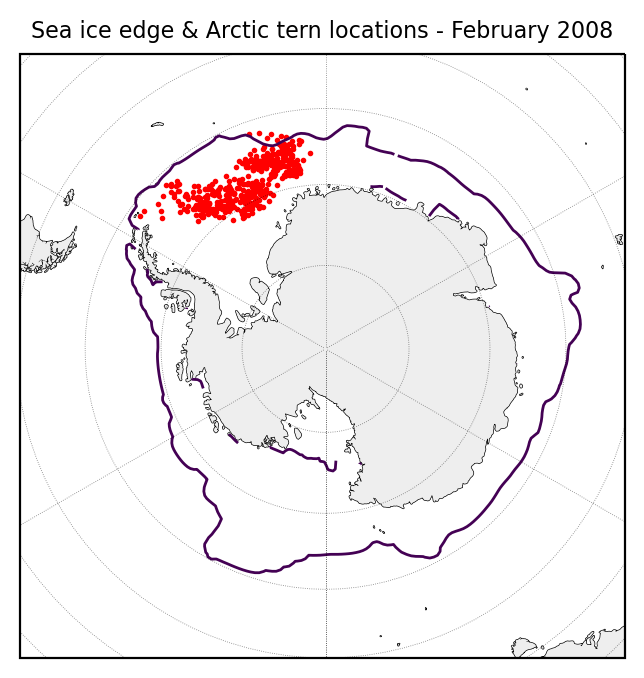

In [260]:
year = 2008
month = 2

migration_2008 = migration[pd.to_datetime(migration['Date'], dayfirst=True).dt.year==year]
migration_2008_jan = migration_2008[pd.to_datetime(migration_2008['Date'], dayfirst=True).dt.month==month]

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')
#im = plt.scatter(x, y, c=regrid.siconc.sel(time='2009-01'),cmap='Spectral_r',vmin=0,vmax=1,s=0.1,transform=ccrs.PlateCarree())
plt.contour(x, y, regrid.siconc.sel(time=str(year)+'-'+str("{:02d}".format(month)))[0,:,:], levels=[0.15], linewidths=1, transform=ccrs.PlateCarree())
plt.scatter(migration_2008_jan['Long'], migration_2008_jan['Lat'], c='Red', cmap='Spectral_r', s=1,transform=ccrs.PlateCarree())
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('Sea ice edge & Arctic tern locations - '+calendar.month_name[month]+' '+str(year),fontsize=8)